<a href="https://colab.research.google.com/github/FelipeOcampo03/regressionDL/blob/main/regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

In [4]:
(train_data, train_labels), (test_data, test_labels)= boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [5]:
train_data.shape

(404, 13)

In [8]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
test_labels[0]

7.2

In [9]:
mean = train_data.mean(axis=0)
train_data= train_data- mean
std = train_data.std(axis=0)
train_data= train_data / std

test_data= test_data - mean
test_data = test_data / mean

In [29]:
def build_model_regression(lr_var, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) #Como es un valor (lineal), no se necesita poner una capa de activación
  model.compile(optimizer= optimizers.RMSprop(lr= lr_var), loss='mse', metrics =['mae'])
  return model

In [28]:
k = 4 #Set de validación, iteraciones
num_val_samples= len(train_data) // k
num_epoch = 500
all_history = []


In [17]:
valor= 2
(valor)* num_val_samples

202

In [30]:
for i in range(k):
  print("Fold:" ,i)
  val_data = train_data[i*num_val_samples: (i+1) *num_val_samples]
  val_targets = train_labels[i*num_val_samples: (i+1) *num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)* num_val_samples:] ], axis=0 )

  partial_train_targets = np.concatenate(
      [train_labels[:i * num_val_samples],
       train_labels[(i+1)* num_val_samples:] ], axis=0 )
  model = build_model_regression(0.001,13)
  history= model.fit(partial_train_data, partial_train_targets, epochs= num_epoch, batch_size= 16, validation_data= (val_data, val_targets), verbose= 0)
  all_history.append(history.history['val_mae'])



Fold: 0


Fold: 1


Fold: 2


Fold: 3


In [31]:
all_mae_avg= pd.DataFrame(all_history).mean(axis=0)

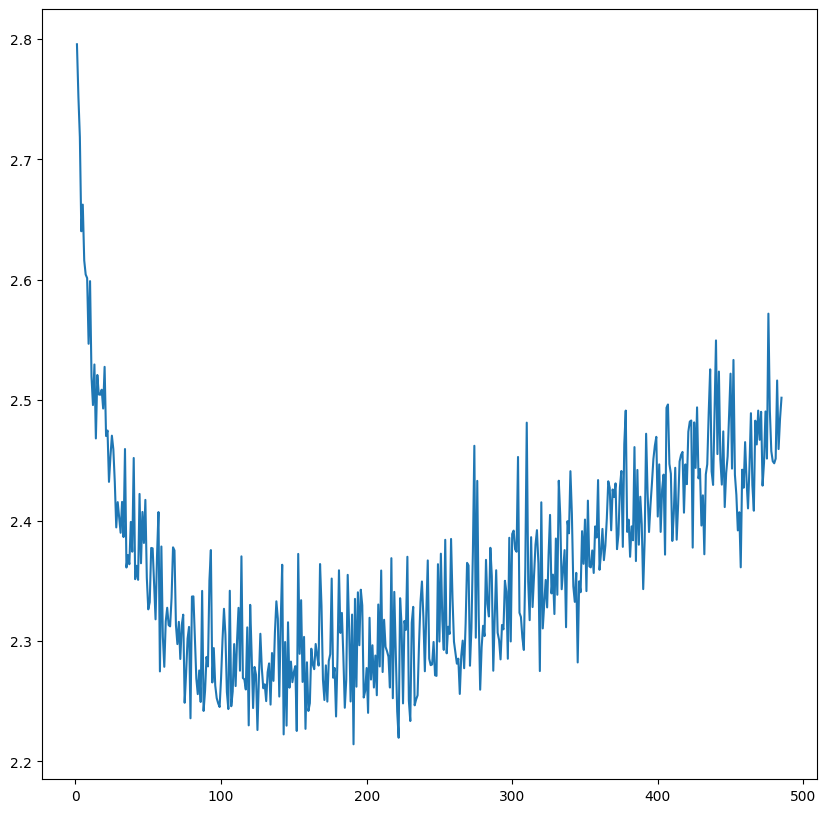

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [36]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 301.2029 - mae: 11.7060


[301.202880859375, 11.705976486206055]